In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval

In [2]:
# dataset_path = '../../data/benchmark/full_test.csv'
dataset_path = '../../data/benchmark/lt2_windows__cvs_gt2.csv'
# dataset_path = '../../data/benchmark/multiple_windows.csv'


n_preds_path = '../../data/benchmark/preds/n_esm2.npy'
c_preds_path = '../../data/benchmark/preds/c_esm2.npy'
# n_preds_path = '../../data/benchmark/preds/n_bilstm_att.npy'
# c_preds_path = '../../data/benchmark/preds/c_bilstm_att.npy'
# n_preds_path = '../../data/benchmark/preds/n_bilstm.npy'
# c_preds_path = '../../data/benchmark/preds/c_bilstm.npy'
# n_preds_path = '../../data/benchmark/preds/n_bilstm_mw.npy'
# c_preds_path = '../../data/benchmark/preds/c_bilstm_mw.npy'

In [3]:
data_df = pd.read_csv(dataset_path)
data_df.head()

,protein,cleavages
0,AAADSAQWLSVKEETIFLHDGLIRVTDLAELPSEILGAPEAADTDL...,"[(52, 63), (17, 25), (52, 62)]"
1,ACAWLEAQEEEEVGFPVRPQVPLRPMTYKAAVDLSHFLKEKGGLEG...,"[(29, 37), (141, 150), (141, 149)]"
2,AFAQRALSDSLSRRLRRHVPTHQSRRRSLGHLSPTARRACEDAIRC...,"[(108, 116), (92, 100), (103, 112), (74, 82), ..."
3,AWRRRRSGTSGKATWWCSGLRRASPTPSRRVQSWATAVMWKPSPSS...,"[(224, 232), (225, 233), (219, 232), (65, 73)]"
4,DHVASCGVNLYQFYGPSGQFTHEFDGDEQFYVDLEKKETAWRWPEF...,"[(38, 46), (22, 31), (22, 32), (41, 49), (22, ..."


In [4]:
c_preds = np.load(c_preds_path, allow_pickle=True)
n_preds = np.load(n_preds_path, allow_pickle=True)

n_preds.shape, c_preds.shape

((867,), (867,))

In [5]:
cleavages = data_df['cleavages'].apply(literal_eval).values
seq_lens = data_df['protein'].apply(len).values

In [6]:
n_targets = [np.zeros(seq_len + 1) for seq_len in seq_lens]
c_targets = [np.zeros(seq_len + 1) for seq_len in seq_lens]

for i, cleavage in enumerate(cleavages):
    for n, c in cleavage:
        n_targets[i][n - 1] = 1
        c_targets[i][c] = 1

In [7]:
n_preds[1][:100]

array([-1.5493163 , -1.477784  , -0.6431524 , -1.3312005 , -0.31533682,
       -0.59963495, -1.1217619 , -0.05622941,  0.00632592, -0.83161736,
        0.31935447, -1.0659126 , -0.5861283 , -1.4277213 ,  0.20779882,
       -1.3989862 , -1.4045691 , -0.8790149 , -1.3232083 , -1.1423447 ,
       -0.15992059, -1.2301158 , -1.1734009 , -0.2195705 , -1.6082132 ,
       -0.54565763, -0.8597211 , -1.6202878 , -0.3930518 , -0.01408741,
       -0.34304947, -0.92231363, -1.3887542 , -0.8262506 , -0.33348638,
       -1.0136576 ,  0.08828376, -1.4210712 , -0.04439436, -1.618097  ,
       -1.1323441 , -1.0056063 , -0.32333136, -0.8596663 , -1.4822098 ,
       -0.90499717, -0.8370078 , -0.1336657 , -1.0613092 , -1.2241453 ,
       -0.9935928 ,  1.1524882 , -1.1158568 , -1.2499862 , -0.8290754 ,
       -0.21598546, -1.4967397 , -1.0162532 , -1.5972667 , -0.9724007 ,
       -0.32270867, -0.6361343 , -0.37956482, -1.046321  , -1.2337267 ,
       -0.76311237,  0.4928723 , -0.37259036, -1.5076097 , -1.60

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
n_preds = [sigmoid(pred) for pred in n_preds]
c_preds = [sigmoid(pred) for pred in c_preds]

In [10]:
n_preds[0], n_targets[0]

(array([0.47291437, 0.57571363, 0.20895435, 0.27256435, 0.31234348,
        0.49782002, 0.21308649, 0.22252758, 0.33195233, 0.43059996,
        0.1858279 , 0.3521353 , 0.3376633 , 0.5065383 , 0.29327598,
        0.2530607 , 0.4906245 , 0.33899587, 0.27961215, 0.22304684,
        0.3563569 , 0.22074313, 0.42774245, 0.3917463 , 0.40381032,
        0.2547266 , 0.26925185, 0.23390807, 0.6422233 , 0.32513678,
        0.5538558 , 0.18562925, 0.32475355, 0.25410038, 0.29466   ,
        0.2473898 , 0.3581459 , 0.6029191 , 0.2151792 , 0.38179174,
        0.34068054, 0.20774594, 0.38017696, 0.30772215, 0.20103541,
        0.38746017, 0.3203793 , 0.28755048, 0.31707647, 0.24807149,
        0.34965956, 0.47624537, 0.3737139 , 0.19574408, 0.4458869 ,
        0.21552825, 0.33451423, 0.29643092, 0.29898688, 0.3781772 ,
        0.3605462 , 0.37214425, 0.19989909, 0.35577923, 0.42168745,
        0.20249602, 0.15639712, 0.21377671, 0.44574136, 0.33836973,
        0.19947584, 0.3817433 , 0.2718124 , 0.37

In [11]:
n_preds[0] - n_targets[0]

array([ 0.47291437,  0.57571363,  0.20895435,  0.27256435,  0.31234348,
        0.49782002,  0.21308649,  0.22252758,  0.33195233,  0.43059996,
        0.1858279 ,  0.3521353 ,  0.33766329,  0.50653827,  0.29327598,
        0.2530607 , -0.50937551,  0.33899587,  0.27961215,  0.22304684,
        0.35635689,  0.22074313,  0.42774245,  0.39174631,  0.40381032,
        0.25472659,  0.26925185,  0.23390807,  0.6422233 ,  0.32513678,
        0.55385578,  0.18562925,  0.32475355,  0.25410038,  0.29466   ,
        0.24738979,  0.35814589,  0.6029191 ,  0.2151792 ,  0.38179174,
        0.34068054,  0.20774594,  0.38017696,  0.30772215,  0.20103541,
        0.38746017,  0.32037929,  0.28755048,  0.31707647,  0.24807149,
        0.34965956, -0.52375463,  0.37371391,  0.19574408,  0.44588691,
        0.21552825,  0.33451423,  0.29643092,  0.29898688,  0.3781772 ,
        0.3605462 ,  0.37214425,  0.19989909,  0.35577923,  0.42168745,
        0.20249602,  0.15639712,  0.21377671,  0.44574136,  0.33

In [12]:
c_preds_concat = np.concatenate(c_preds)
n_preds_concat = np.concatenate(n_preds)

c_targets_concat = np.concatenate(c_targets)
n_targets_concat = np.concatenate(n_targets)

c_preds_concat.shape, n_preds_concat.shape, c_targets_concat.shape, n_targets_concat.shape

((397783,), (397783,), (397783,), (397783,))

In [13]:
from sklearn import metrics

In [14]:
fpr_c, tpr_c, thresholds_c = metrics.roc_curve(c_targets_concat, c_preds_concat)
fpr_n, tpr_n, thresholds_n = metrics.roc_curve(n_targets_concat, n_preds_concat)

roc_auc_c = metrics.auc(fpr_c, tpr_c)
roc_auc_n = metrics.auc(fpr_n, tpr_n)

print(f"C - Terminus ROC AUC: {roc_auc_c}")
print(f"N - Terminus ROC AUC: {roc_auc_n}")

C - Terminus ROC AUC: 0.763207411964418
N - Terminus ROC AUC: 0.6721562688452857


In [15]:
import matplotlib.pyplot as plt

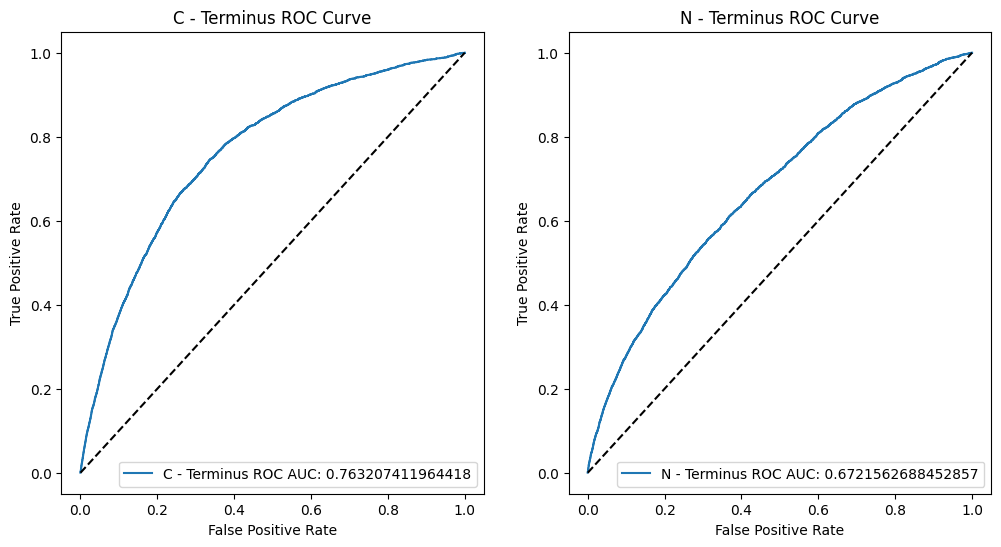

In [16]:
# plot ROC curves for both models (on separate plots):

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(fpr_c, tpr_c, label=f"C - Terminus ROC AUC: {roc_auc_c}")
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('C - Terminus ROC Curve')
ax[0].legend()

ax[1].plot(fpr_n, tpr_n, label=f"N - Terminus ROC AUC: {roc_auc_n}")
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('N - Terminus ROC Curve')
ax[1].legend()

plt.show()

In [17]:
trh = 0.5

In [18]:
print(f"C Terminus Precission: {metrics.precision_score(c_targets_concat, c_preds_concat > trh)}")
print(f"N Terminus Precission: {metrics.precision_score(n_targets_concat, n_preds_concat > trh)}")

C Terminus Precission: 0.0330341671479984
N Terminus Precission: 0.02697529228141473


In [19]:
print(f"C Terminus Recall: {metrics.recall_score(c_targets_concat, c_preds_concat > trh)}")
print(f"N Terminus Recall: {metrics.recall_score(n_targets_concat, n_preds_concat > trh)}")

C Terminus Recall: 0.4007006197790353
N Terminus Recall: 0.24663435648896068


In [20]:
print(f"C Terminus F1: {metrics.f1_score(c_targets_concat, c_preds_concat > trh)}")
print(f"N Terminus F1: {metrics.f1_score(n_targets_concat, n_preds_concat > trh)}")

C Terminus F1: 0.06103642893791688
N Terminus F1: 0.048631573358817126


In [29]:
arr = np.array([1, 3, 5, 2, 4, 0])
np.argsort(-arr).argsort()/(len(arr))

array([0.66666667, 0.33333333, 0.        , 0.5       , 0.16666667,
       0.83333333])

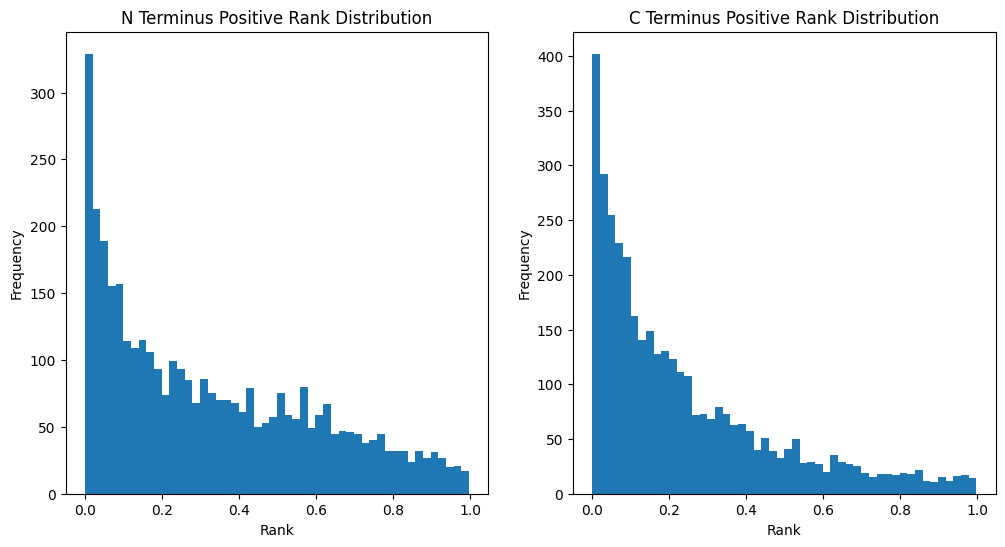

In [31]:
# N terminus positives rank
n_pos_quantiles = []

for n_pred, n_target in zip(n_preds, n_targets):
    positive_indices = np.where(n_target == 1)[0]
    normalized_ranks = np.argsort(-n_pred).argsort() / len(n_pred)
    n_pos_quantiles.extend(normalized_ranks[positive_indices])    

c_pos_quantiles = []

for c_pred, c_target in zip(c_preds, c_targets):
    positive_indices = np.where(c_target == 1)[0]
    normalized_ranks = np.argsort(-c_pred).argsort() / len(c_pred)
    c_pos_quantiles.extend(normalized_ranks[positive_indices])


# plot histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(n_pos_quantiles, bins=50)
ax[0].set_title('N Terminus Positive Rank Distribution')
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Frequency')

ax[1].hist(c_pos_quantiles, bins=50)
ax[1].set_title('C Terminus Positive Rank Distribution')
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Frequency')

plt.show()

In [47]:
# Heuristic epitope retrieval

def get_epitopes(n_pred, c_pred, min_epitope_len=4, max_epitope_len=16, top_k=50):
    threshold_c = np.sort(-c_pred)[top_k]
    threshold_n = np.sort(-n_pred)[top_k]
    epitopes = []
    probs = []
    
    for n in range(len(n_pred)):
        if n_pred[n] < threshold_n:
            continue
        for c in range(n + min_epitope_len, min(n + max_epitope_len + 1, len(c_pred))):
            if c_pred[c] < threshold_c:
                continue
            epitopes.append((n+1, c))
            probs.append(n_pred[n] * c_pred[c])
        sorted_indices = np.argsort(-np.array(probs))
        epitopes = [epitopes[i] for i in sorted_indices]
        probs = [probs[i] for i in sorted_indices]

    return epitopes, probs

print(cleavages[0])
eps, probs = get_epitopes(n_preds[0], c_preds[0])
eps[:10], probs[:10]

[(52, 63), (17, 25), (52, 62)]


([(76, 80),
  (38, 51),
  (69, 74),
  (76, 85),
  (76, 89),
  (65, 74),
  (52, 59),
  (29, 41),
  (55, 59),
  (60, 74)],
 [0.44099376,
  0.38585845,
  0.37903285,
  0.37167194,
  0.3658451,
  0.3585788,
  0.34883747,
  0.3283599,
  0.32660067,
  0.32158017])

In [49]:
from tqdm import tqdm

def calculate_at_K_metrics(n_preds, c_preds, cleavages, Ks=[1, 2, 3, 5, 10]):
    metrics = {
        k: {
            'precision': [],
            'recall': [],
            'rprecision': []
        } for k in Ks
    }
    for n_pred, c_pred, cleavs in tqdm(zip(n_preds, c_preds, cleavages), total=len(n_preds)):
        pred_epitopes, _ = get_epitopes(n_pred, c_pred, top_k=25)
        for k in Ks:
            r = int(len(cleavs))
            s = min(k, r)
            pred_epitopes_k = pred_epitopes[:k]
            intersection = set(tuple(x) for x in pred_epitopes_k) & set(tuple(x) for x in cleavs)
            metrics[k]['precision'].append(len(intersection) / k)
            metrics[k]['recall'].append(len(intersection) / r)
            pred_epitopes_s = pred_epitopes[:s]
            intersection = set(tuple(x) for x in pred_epitopes_s) & set(tuple(x) for x in cleavs)
            metrics[k]['rprecision'].append(len(intersection) / s)
    for k in Ks:
        print(f"At {k}:")
        print(f"Precision: {np.mean(metrics[k]['precision'])}")
        print(f"Recall: {np.mean(metrics[k]['recall'])}")
        print(f"R-Precision: {np.mean(metrics[k]['rprecision'])}")
        print()

calculate_at_K_metrics(n_preds, c_preds, cleavages)
        

100%|██████████| 867/867 [7:40:18<00:00, 31.85s/it]      

At 1:
Precision: 0.03690888119953864
Recall: 0.00831781316210382
R-Precision: 0.03690888119953864

At 2:
Precision: 0.03460207612456748
Recall: 0.015134937621198562
R-Precision: 0.03460207612456748

At 3:
Precision: 0.029219530949634753
Recall: 0.01939428842034175
R-Precision: 0.029219530949634753

At 5:
Precision: 0.02583621683967705
Recall: 0.02921324365452189
R-Precision: 0.02572087658592849

At 10:
Precision: 0.023414071510957327
Recall: 0.053505607215153315
R-Precision: 0.024981234323794878



In [ ]:
for i in range(10):
    pos_n_preds_idx = np.where(n_preds[i] > trh)[0]
    pos_c_preds_idx = np.where(c_preds[i] > trh)[0]
    pos_n_targets_idx = np.where(n_targets[i])[0]
    pos_c_targets_idx = np.where(c_targets[i])[0]

    print(f"Protein {i}")
    print(f"Positive N preds: {pos_n_preds_idx}")
    print(f"Positive N targets: {pos_n_targets_idx}")
    print()
    print(f"Positive C preds: {pos_c_preds_idx}")
    print(f"Positive C targets: {pos_c_targets_idx}")
    print()

Protein 0
Positive N preds: [ 1 13 28 30 37 75 79 86]
Positive N targets: [16 51]

Positive C preds: [ 18  25  28  41  51  59  63  66  74  80  85  89  97 103]
Positive C targets: [25 62 63]

Protein 1
Positive N preds: [  8  10  14  36  51  66  74  79  90  92 100 105 112 118 125 129 133]
Positive N targets: [ 28 140]

Positive C preds: [  4  15  21  28  37  38  47  52  60  67  74  82  88 103 111 117 128 138
 145 149 150]
Positive C targets: [ 37 149 150]

Protein 2
Positive N preds: [ 12  15  41  43  48  70 107 124 135 149 158 164 169 172 195 197 230 245
 254 263 268 273 289 309 320 328 329 349 362 397 403 407 412 424 433 447
 465 471 478 485 492 500 506 518 520 524 538 540 547 560 573 575 587]
Positive N targets: [ 73  91 102 107 309]

Positive C preds: [  2   7  11  25  48  53  58  81  92  98 102 112 116 127 142 152 161 167
 177 184 191 203 210 215 233 248 252 260 280 284 285 289 297 301 311 315
 319 323 329 338 356 362 372 379 388 391 415 420 426 432 439 445 450 460
 466 476 481 488